In [47]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение хи-квадрат

Сгенерируем выборку объёма 1000 из распределения хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы:

In [36]:
k = 7
rv = sts.chi2(k)
sample = rv.rvs(1000)
#print(sample)

Построим гистограмму выборки(оранжевый) и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины(синий)

Text(0.5,0,'$x$')

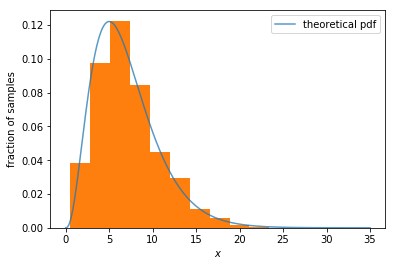

In [46]:
x = np.linspace(0,35,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1.75)
plt.legend()
plt.hist(sample, density = True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')


Учитывая, что мат. ожидание $E(\chi^2_k) = k$

и $D(\chi^2_k) = 2k$

In [76]:
# функция построения гистограммы распределений выборочных средних и плотности соответствующего нормального распределения
#sizeSamples - размер выборок
def chi2F(sizeSamples):
    n = sizeSamples
    k =  7
    #генерация 1000 выборок размера n
    values = np.array([ sts.chi2.rvs(k, size=n) for x in range(1000)])
    #вычисление выборочных средних
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, density=True, alpha=0.5, label='hist mean n ' + str(n))
    Ex = k
    Dx = 2*k
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print('mu = ' , mu)
    print('sigma = ' , sigma)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,35,1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='chi2 pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

In [77]:
#Вычисление теоритических EX, DX  распределения
EX = k
DX = 2*k
print('Ex=', EX,'DX=', DX)

Ex= 7 DX= 14


mu =  7
sigma =  1.6733200530681511


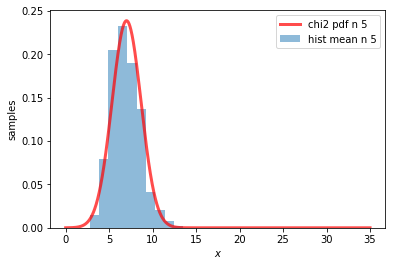

In [78]:
chi2F(5)

mu =  7
sigma =  1.1832159566199232


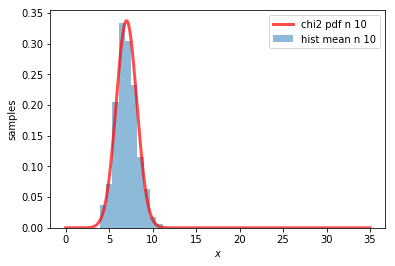

In [79]:
chi2F(10)

mu =  7
sigma =  0.5291502622129182


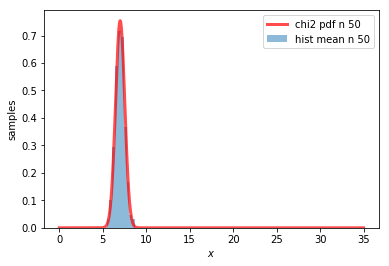

In [81]:
chi2F(50)

## Вывод

Распределение выборочных средних для функции $\chi^2_k$ хорошо описывается нормальным распределением.

С ростом $n$ (объёмом выборок) точность аппроксимации увеличивается.